# **Credit Scoring Model**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score ,  roc_auc_score, roc_curve

In [ ]:
df = pd.read_csv('/content/credit_risk_dataset.csv')
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

## **Data Exploration & Cleaning**

In [ ]:
df.shape

(32581, 12)

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [ ]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(32416, 12)

In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,3.241600e+04,31529.00000,32416.000000,29321.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,4.79051,9593.845632,11.017265,0.218688,0.170250,5.811297
std,6.354100,6.201558e+04,4.14549,6322.730241,3.241680,0.413363,0.106812,4.059030
min,20.000000,4.000000e+03,0.00000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.854200e+04,2.00000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.00000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.921800e+04,7.00000,12250.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.00000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
df.describe(include='object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32416,32416,32416,32416
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16378,6411,10703,26686


In [ ]:
median_loan_int_rate = df['loan_int_rate'].median()
df['loan_int_rate'].fillna(median_loan_int_rate, inplace=True)

display(df.isna().sum())

/tmp/ipython-input-3375423099.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['loan_int_rate'].fillna(median_loan_int_rate, inplace=True)


,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,887
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [ ]:
df = df[df['person_age'] <= 100]
display(df['person_age'].describe())

,person_age
count,32411.000000
mean,27.730369
std,6.210448
min,20.000000
25%,23.000000
50%,26.000000
75%,30.000000
max,94.000000


In [ ]:
max_emp_length= 60
df[df['person_emp_length'] > max_emp_length]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [ ]:
df = df[df['person_emp_length'] <= max_emp_length]

In [ ]:
df['person_emp_length'].describe()

,person_emp_length
count,31522.000000
mean,4.782850
std,4.037343
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,41.000000


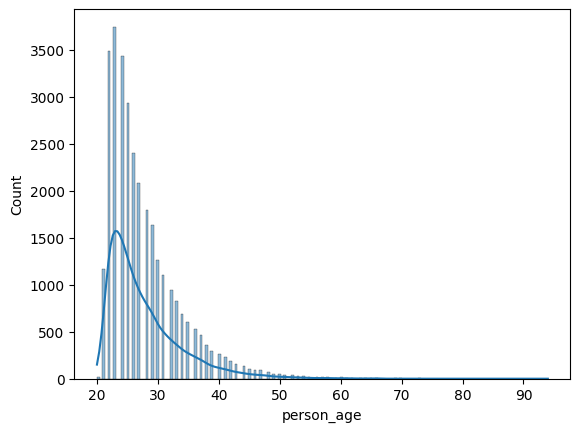

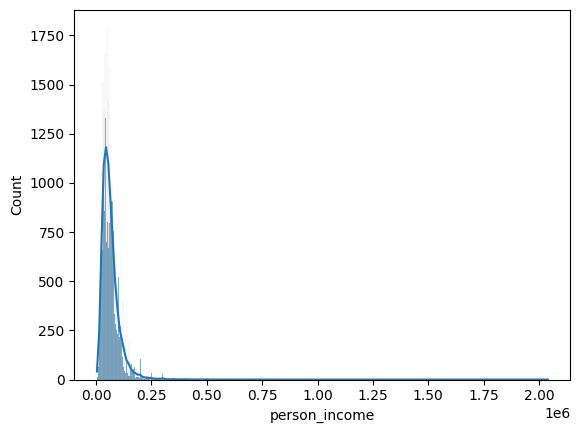

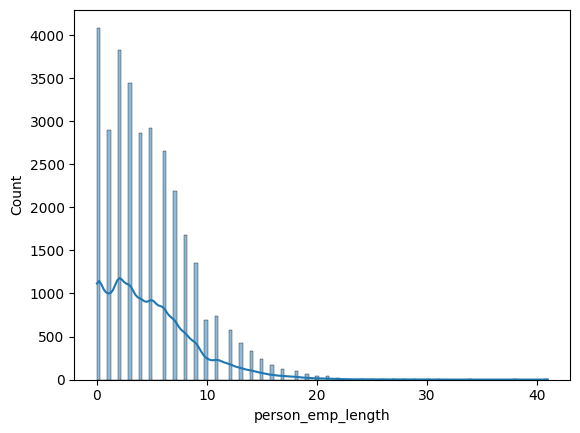

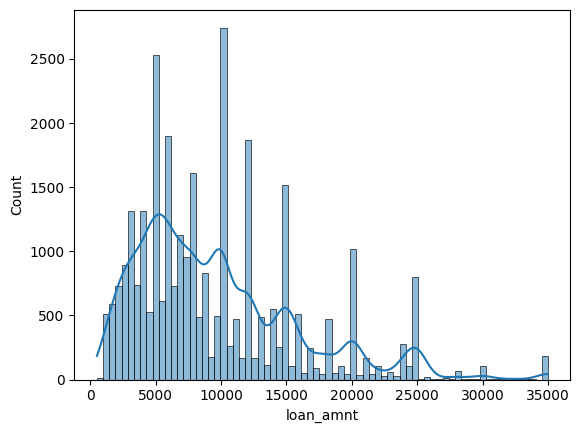

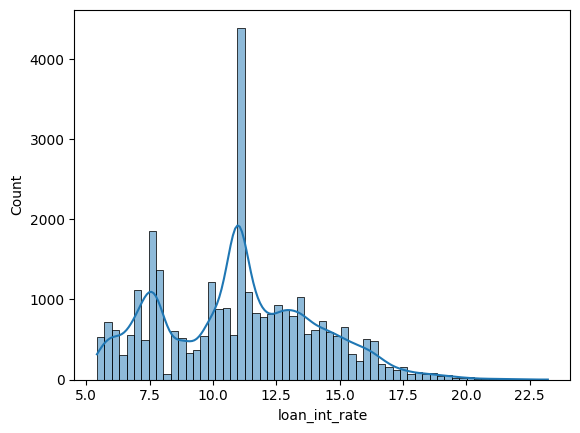

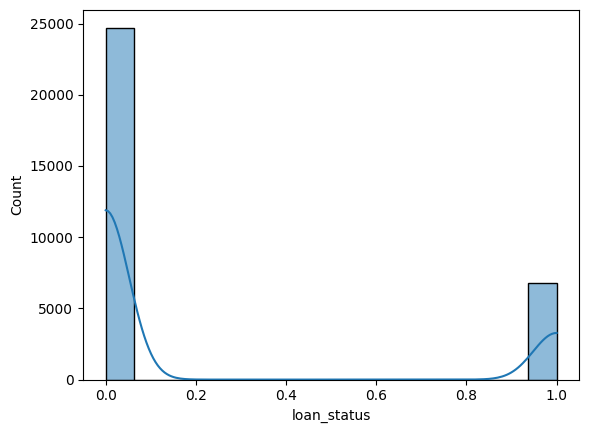

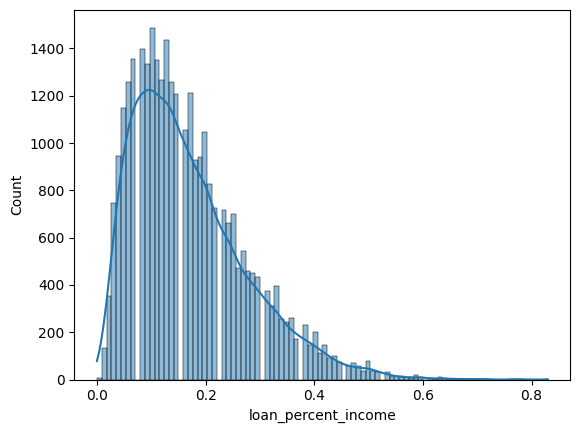

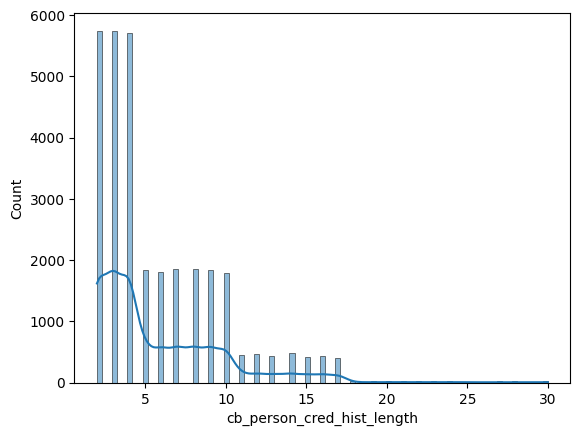

In [ ]:
numeric_col = df.select_dtypes(include=['int64', 'float64']).columns

for i in numeric_col:
  print("")
  sns.histplot(df[i], kde=True)
  plt.show()

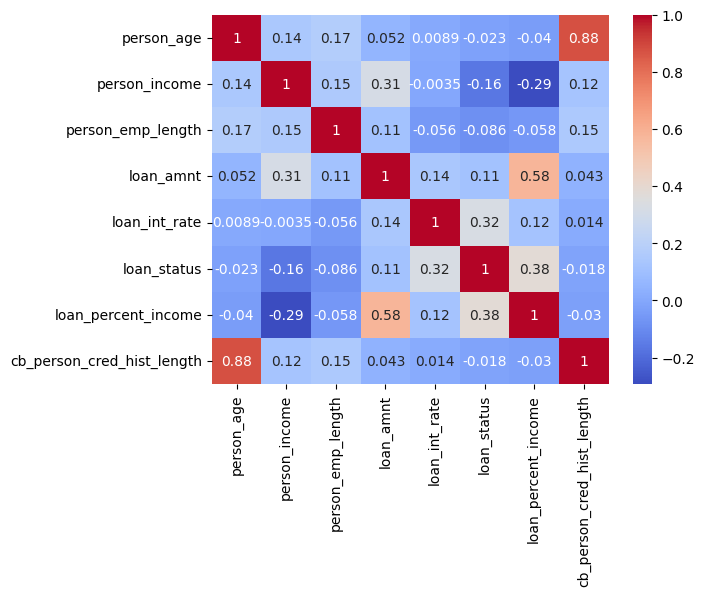

In [ ]:
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df.drop(columns=['person_age'], inplace=True) # To avoid multicollinearity

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
  print(f"{col}: {df[col].nunique()}")
  print(df[col].value_counts())

person_home_ownership: 4
person_home_ownership
RENT        16007
MORTGAGE    13018
OWN          2391
OTHER         106
Name: count, dtype: int64
loan_intent: 6
loan_intent
EDUCATION            6246
MEDICAL              5869
VENTURE              5518
PERSONAL             5346
DEBTCONSOLIDATION    5044
HOMEIMPROVEMENT      3499
Name: count, dtype: int64
loan_grade: 7
loan_grade
A    10300
B    10121
C     6301
D     3549
E      951
F      236
G       64
Name: count, dtype: int64
cb_person_default_on_file: 2
cb_person_default_on_file
N    25908
Y     5614
Name: count, dtype: int64


**Encoding Categorical Data**



In [ ]:
# Encode binary categorical column
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'Y': 1, 'N': 0})

In [ ]:
# One-hot encode the rest
nominal_cols = ['person_home_ownership', 'loan_intent', 'loan_grade']
df_encoded_nominal = pd.get_dummies(df[nominal_cols], drop_first=True)

df = df.drop(columns=nominal_cols, errors='ignore')

df = pd.concat([df, df_encoded_nominal], axis=1)
display(df.head())

,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
1,9600,5.0,1000,11.14,0,0.10,0,2,False,True,...,False,False,False,False,True,False,False,False,False,False
2,9600,1.0,5500,12.87,1,0.57,0,3,False,False,...,False,True,False,False,False,True,False,False,False,False
3,65500,4.0,35000,15.23,1,0.53,0,2,False,False,...,False,True,False,False,False,True,False,False,False,False
4,54400,8.0,35000,14.27,1,0.55,1,4,False,False,...,False,True,False,False,False,True,False,False,False,False
5,9900,2.0,2500,7.14,1,0.25,0,2,False,True,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
df = df.astype({col: int for col in df.select_dtypes('bool').columns})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31522 entries, 1 to 32580
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_income                31522 non-null  int64  
 1   person_emp_length            31522 non-null  float64
 2   loan_amnt                    31522 non-null  int64  
 3   loan_int_rate                31522 non-null  float64
 4   loan_status                  31522 non-null  int64  
 5   loan_percent_income          31522 non-null  float64
 6   cb_person_default_on_file    31522 non-null  int64  
 7   cb_person_cred_hist_length   31522 non-null  int64  
 8   person_home_ownership_OTHER  31522 non-null  int64  
 9   person_home_ownership_OWN    31522 non-null  int64  
 10  person_home_ownership_RENT   31522 non-null  int64  
 11  loan_intent_EDUCATION        31522 non-null  int64  
 12  loan_intent_HOMEIMPROVEMENT  31522 non-null  int64  
 13  loan_intent_MEDICAL  

In [ ]:
df['loan_status'].value_counts(normalize=True)

,proportion
loan_status,
0,0.784056
1,0.215944


In [ ]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

**Train-Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## **Model Training**

### ***1. Logistic Regression***

In [ ]:
log_reg = LogisticRegression(max_iter=1000,class_weight='balanced',
    random_state=42)
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
y_reg_pred= log_reg.predict(X_test)

**Model Evaluation**

In [ ]:
print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_reg_pred))
print("Precision:", precision_score(y_test, y_reg_pred))
print("Recall:", recall_score(y_test, y_reg_pred))
print("F1-score:", f1_score(y_test, y_reg_pred))

print("\n Classification Report \n", classification_report(y_test, y_reg_pred))

Logistic Regression Results
Accuracy: 0.7846153846153846
Precision: 0.5009578544061303
Recall: 0.7679882525697503
F1-score: 0.6063768115942029

 Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.79      0.85      4943
           1       0.50      0.77      0.61      1362

    accuracy                           0.78      6305
   macro avg       0.71      0.78      0.73      6305
weighted avg       0.83      0.78      0.80      6305



In [ ]:
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Compute ROC–AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC–AUC: {roc_auc:.3f}")


ROC–AUC: 0.852


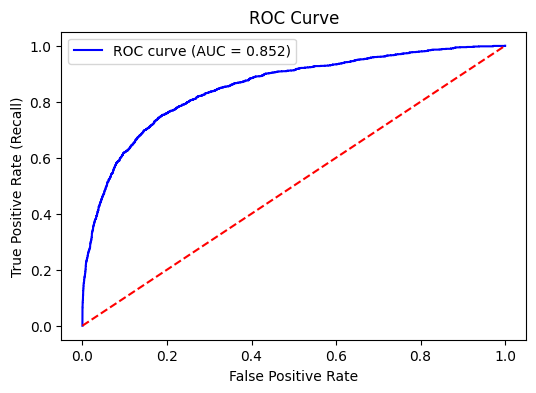

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.show()

### ***2. Decision Tree Classifier***

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=None, class_weight='balanced')
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_dt_pred = dt_model.predict(X_test)

**Model Evaluation**

In [ ]:
print("Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_dt_pred))
print("Precision:", precision_score(y_test, y_dt_pred))
print("Recall:", recall_score(y_test, y_dt_pred))
print("F1-score:", f1_score(y_test, y_dt_pred))

print("\n Classification Report \n", classification_report(y_test, y_dt_pred))

Decision Tree Results
Accuracy: 0.8946867565424267
Precision: 0.7540029112081513
Recall: 0.7606461086637298
F1-score: 0.7573099415204678

 Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      4943
           1       0.75      0.76      0.76      1362

    accuracy                           0.89      6305
   macro avg       0.84      0.85      0.85      6305
weighted avg       0.90      0.89      0.89      6305



In [ ]:
y_pred_dt_proba = dt_model.predict_proba(X_test)[:, 1]

# Compute ROC–AUC
roc_auc_dt = roc_auc_score(y_test, y_pred_dt_proba)
print(f"ROC–AUC: {roc_auc_dt:.3f}")

ROC–AUC: 0.846


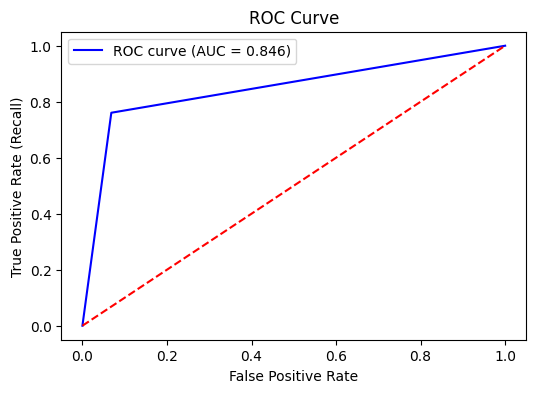

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_dt_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc_dt:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.show()

### ***3. Decision Tree Classifier - Tuned***

In [ ]:
dt_tuned = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=30,
    min_samples_leaf=10,
    class_weight='balanced',
    random_state=42
)
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       min_samples_leaf=10, min_samples_split=30,
                       random_state=42)

In [ ]:
y_dt_pred_tuned = dt_tuned.predict(X_test)

**Model Evaluation**

In [ ]:
print("Tuned Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_dt_pred_tuned))
print("Precision:", precision_score(y_test, y_dt_pred_tuned))
print("Recall:", recall_score(y_test, y_dt_pred_tuned))
print("F1-score:", f1_score(y_test, y_dt_pred_tuned))

print("\n Classification Report \n", classification_report(y_test, y_dt_pred_tuned))

Tuned Decision Tree Results
Accuracy: 0.889452815226011
Precision: 0.740072202166065
Recall: 0.7525697503671072
F1-score: 0.746268656716418

 Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      4943
           1       0.74      0.75      0.75      1362

    accuracy                           0.89      6305
   macro avg       0.84      0.84      0.84      6305
weighted avg       0.89      0.89      0.89      6305



In [ ]:
y_pred_tuned_proba = dt_tuned.predict_proba(X_test)[:, 1]

roc_auc_dt_tuned = roc_auc_score(y_test, y_pred_tuned_proba)
print(f"ROC–AUC: {roc_auc_dt_tuned:.3f}")

ROC–AUC: 0.901


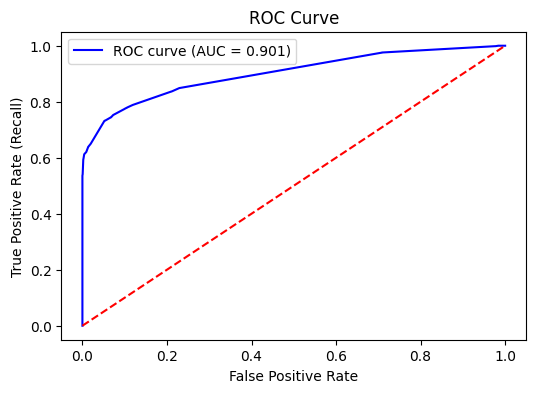

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_tuned_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc_dt_tuned:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.show()

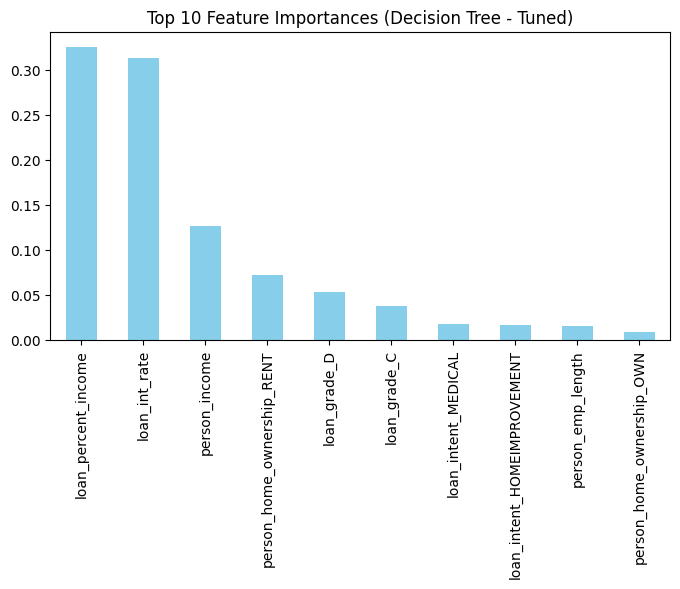

In [ ]:
importances = pd.Series(dt_tuned.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(8,4), color='skyblue')
plt.title('Top 10 Feature Importances (Decision Tree - Tuned)')
plt.show()

### ***4. Random Forest***

In [76]:
rf = RandomForestClassifier(n_estimators=300,max_depth=8, class_weight='balanced',
                            random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=300,
                       random_state=42)

In [77]:
y_rf_pred= rf.predict(X_test)

**Model Evaluation**

In [78]:
print("Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_rf_pred))
print("Precision:", precision_score(y_test, y_rf_pred))
print("Recall:", recall_score(y_test, y_rf_pred))
print("F1-score:", f1_score(y_test, y_rf_pred))

print("\n Classification Report \n", classification_report(y_test, y_rf_pred))

Random Forest Results
Accuracy: 0.897065820777161
Precision: 0.7555555555555555
Recall: 0.7738619676945668
F1-score: 0.7645992020311934

 Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      4943
           1       0.76      0.77      0.76      1362

    accuracy                           0.90      6305
   macro avg       0.85      0.85      0.85      6305
weighted avg       0.90      0.90      0.90      6305



In [79]:
y_pred_rf_proba = rf.predict_proba(X_test)[:, 1]

roc_auc_rf = roc_auc_score(y_test, y_pred_rf_proba)
print(f"ROC–AUC: {roc_auc_rf:.3f}")

ROC–AUC: 0.925


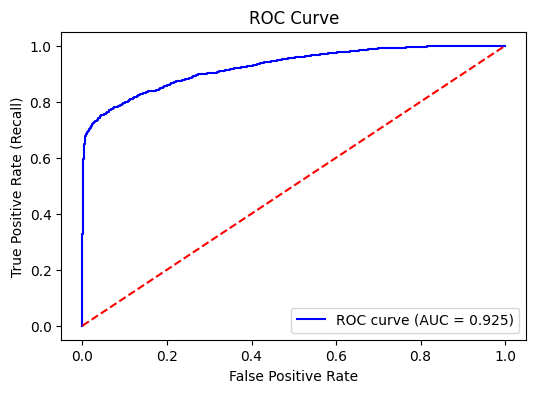

In [80]:
fpr, tpr, _ = roc_curve(y_test, y_pred_rf_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc_rf:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.show()

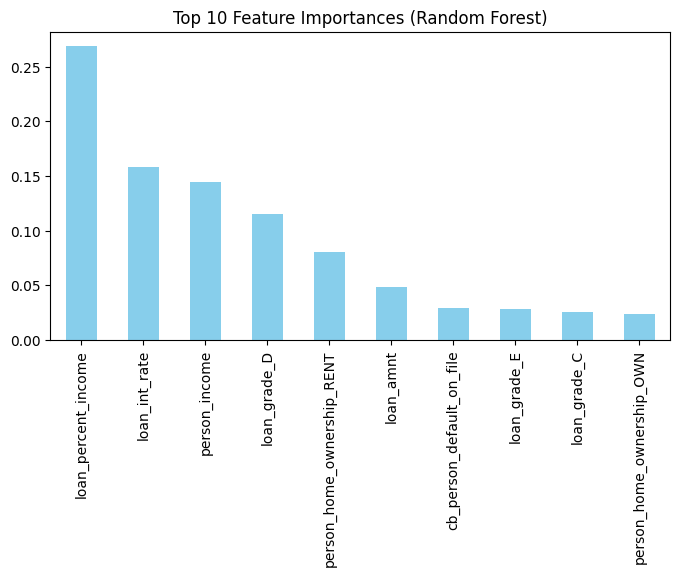

In [82]:
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(8,4), color='skyblue')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

## **Comparing All Models**

In [84]:
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Tuned Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_reg_pred), accuracy_score(y_test, y_dt_pred), accuracy_score(y_test, y_dt_pred_tuned), accuracy_score(y_test, y_rf_pred)],
    'Precision': [precision_score(y_test, y_reg_pred), precision_score(y_test, y_dt_pred), precision_score(y_test, y_dt_pred_tuned), precision_score(y_test, y_rf_pred)],
    'Recall': [recall_score(y_test, y_reg_pred), recall_score(y_test, y_dt_pred), recall_score(y_test, y_dt_pred_tuned), recall_score(y_test, y_rf_pred)],
    'F1-score': [f1_score(y_test, y_reg_pred), f1_score(y_test, y_dt_pred), f1_score(y_test, y_dt_pred_tuned), f1_score(y_test, y_rf_pred)],
    'ROC-AUC': [roc_auc, roc_auc_dt, roc_auc_dt_tuned, roc_auc_rf]
})

display(results_df)

,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Logistic Regression,0.784615,0.500958,0.767988,0.606377,0.852331
1,Decision Tree,0.894687,0.754003,0.760646,0.757310,0.846133
2,Tuned Decision Tree,0.889453,0.740072,0.752570,0.746269,0.900830
3,Random Forest,0.897066,0.755556,0.773862,0.764599,0.925273
